In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report

In [ ]:
!pip install scikit-plot 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Dataset

In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/Data240/Final/Code/processed_drug_dataset.csv')
data.columns.values

array(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness',
       'Conscientiousness', 'Impulsiveness', 'Sensation_seeking',
       'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine',
       'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone',
       'Mushrooms', 'Nicotine', 'Semeron', 'VSA'], dtype=object)

In [ ]:
def drug_trainsplit(df,drug):
  data1=df.copy()
  X=data1.drop(columns=drug)
  y=data1[drug]
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=69,stratify=y)
  sc=StandardScaler()
  X_train=sc.fit_transform(X_train)
  X_test=sc.fit_transform(X_test)
  return X_train,X_test,y_train,y_test

def drug_accuracy(y_t,y_p):
  cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['True[0]','True[1]'],
                columns=['Predict[0]','Predict[1]'])
  ac = accuracy_score(y_t,y_p)
  print(cm)
  print(f'Accuracy score is {ac}')
  print(classification_report(y_test,y_pred))

### Using all features except output (Cannabis)

In [ ]:
X_train,X_test,y_train,y_test=drug_trainsplit(data,'Cannabis')



logisticRegr=LogisticRegression()
logisticRegr.fit(X_train,y_train)
y_pred=logisticRegr.predict(X_test)

drug_accuracy(y_test,y_pred)

         Predict[0]  Predict[1]
True[0]         149          28
True[1]          39         161
Accuracy score is 0.8222811671087533
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       177
           1       0.85      0.81      0.83       200

    accuracy                           0.82       377
   macro avg       0.82      0.82      0.82       377
weighted avg       0.82      0.82      0.82       377



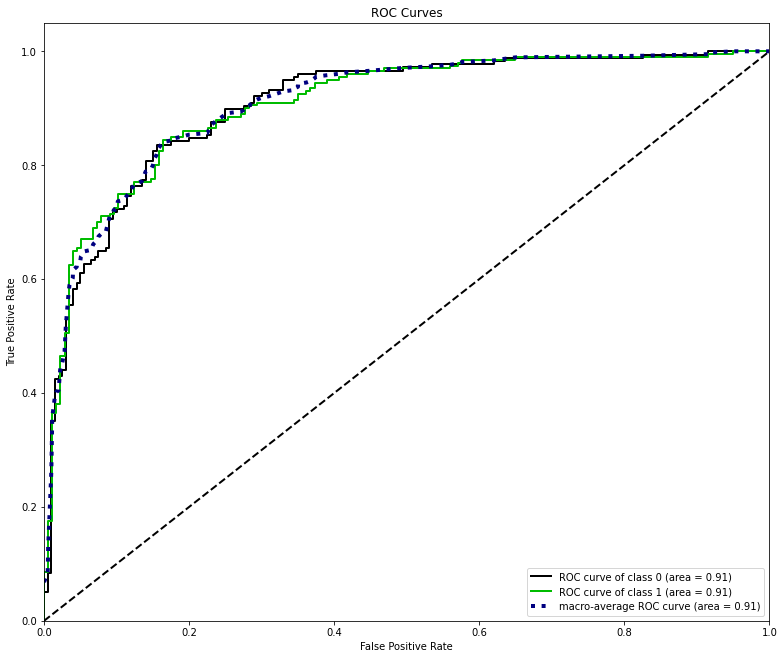

In [ ]:
skplt.metrics.plot_roc(np.array(y_test),logisticRegr.predict_proba(X_test), plot_micro=False, figsize=(13,11))
plt.show()

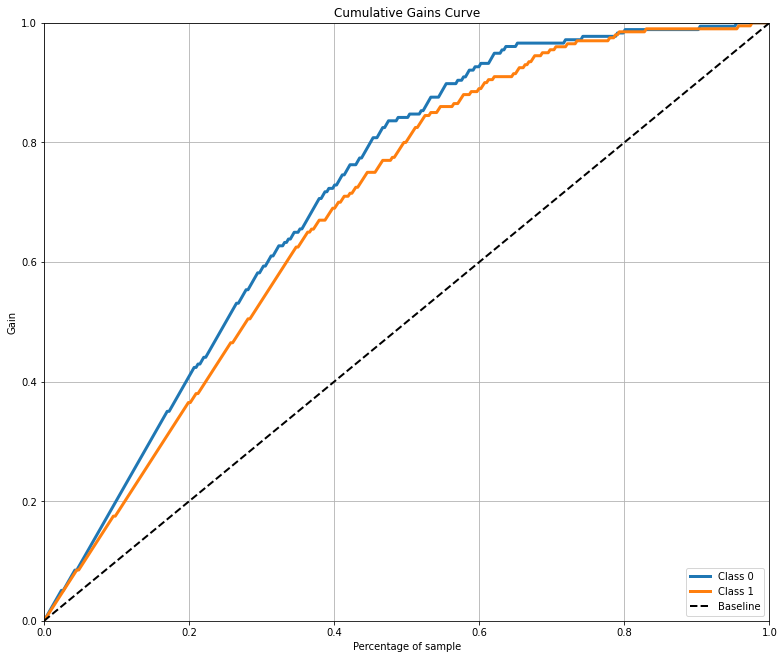

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test,logisticRegr.predict_proba(X_test), figsize=(13,11))
plt.show()

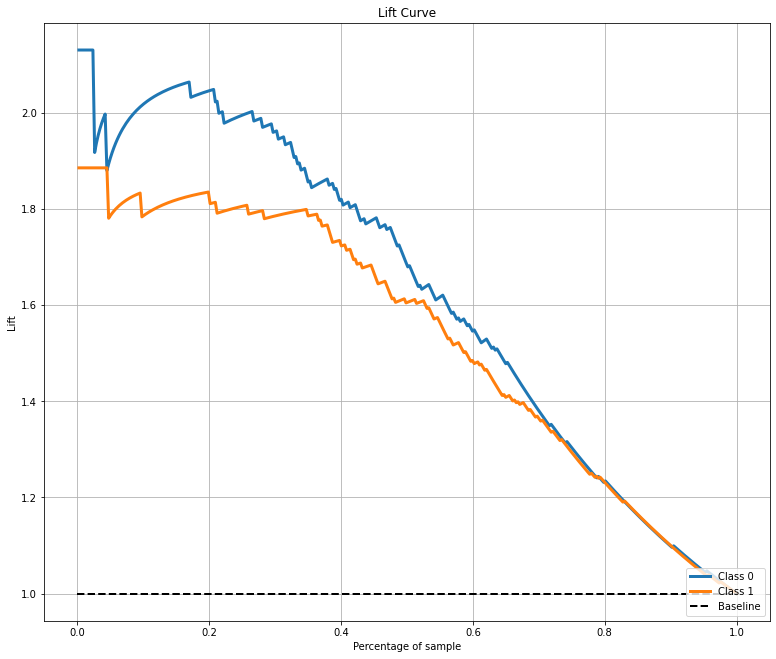

In [ ]:
skplt.metrics.plot_lift_curve(y_test,logisticRegr.predict_proba(X_test),figsize=(13,11))
plt.show()

### Using 'Age', 'Gender', 'Education', 'Extraversion',         'Openness', 'Conscientiousness', 'Sensation_seeking', 'Ecstasy',          'Legal_highs', 'Mushrooms', 'Nicotine'

In [ ]:
#X_train,X_test,y_train,y_test=drug_trainsplit(data[['Age', 'Gender', 'Education',  'Extraversion','Openness', 'Conscientiousness', 'Sensation_seeking','Ecstasy', 'Legal_highs', 'Mushrooms', 'Nicotine','Cannabis']],
#                                              'Cannabis')

X_train,X_test,y_train,y_test=drug_trainsplit(data[['Age', 'Gender','Education', 'Extraversion','Openness', 'Conscientiousness', 'Sensation_seeking', 'Ecstasy', 'Legal_highs', 'Mushrooms', 'Nicotine','Cannabis']],
                                              'Cannabis')

In [ ]:


logisticRegr=LogisticRegression()
logisticRegr.fit(X_train,y_train)
y_pred=logisticRegr.predict(X_test)


drug_accuracy(y_test,y_pred)

         Predict[0]  Predict[1]
True[0]         153          24
True[1]          39         161
Accuracy score is 0.8328912466843501
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       177
           1       0.87      0.81      0.84       200

    accuracy                           0.83       377
   macro avg       0.83      0.83      0.83       377
weighted avg       0.84      0.83      0.83       377



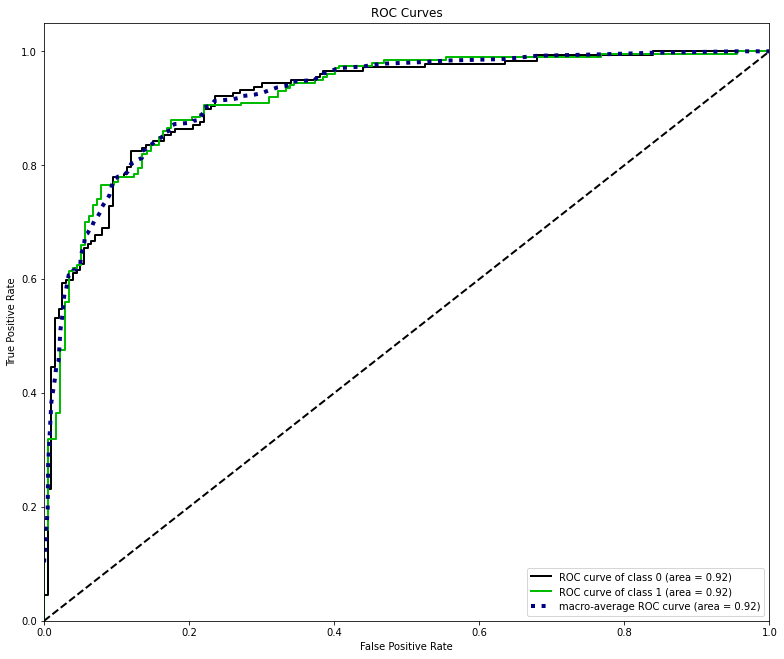

In [ ]:
skplt.metrics.plot_roc(np.array(y_test),logisticRegr.predict_proba(X_test), plot_micro=False, figsize=(13,11))
plt.show()

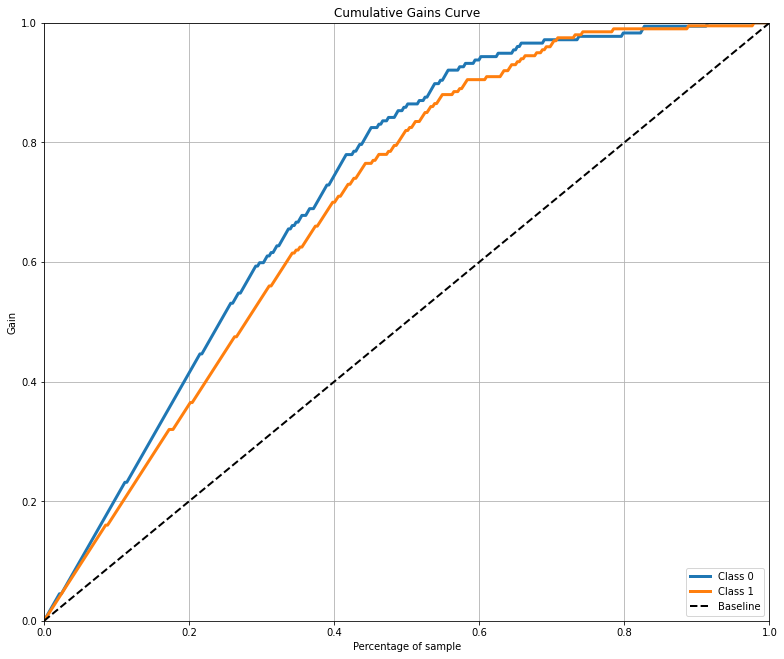

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test,logisticRegr.predict_proba(X_test), figsize=(13,11))
plt.show()

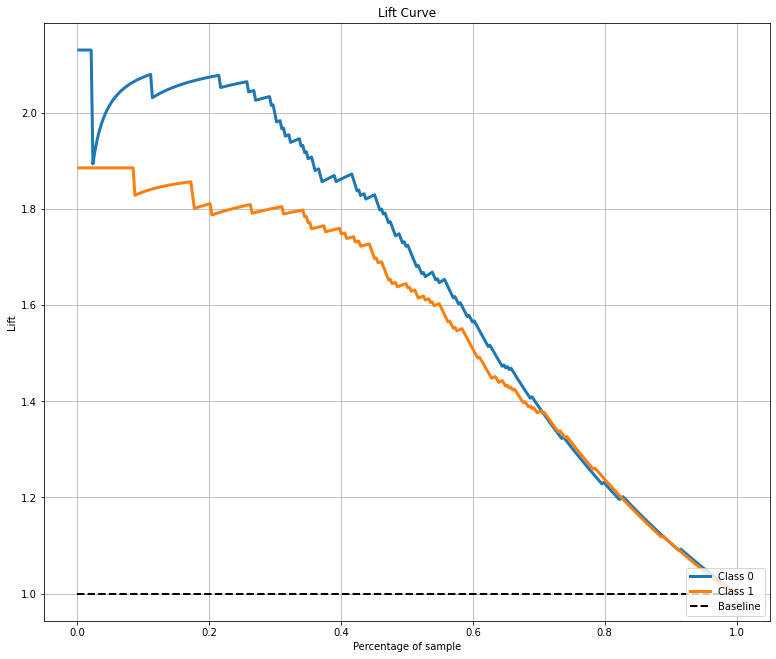

In [ ]:
skplt.metrics.plot_lift_curve(y_test,logisticRegr.predict_proba(X_test),figsize=(13,11))
plt.show()